In [457]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\skce222\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [458]:
import pandas as pd
df = pd.read_csv('../data/flying_pig.csv')
print(df)

     Place    Bib                           Name Division  Age  Gender  \
0        1   9746                Jonathan Harley  OVERALM   24    Male   
1        2  18954                   Bobby Ganser  OVERALM   21    Male   
2        3   9582               Eric Gruenbacher  OVERALM   33    Male   
3        4  13286                   Joey Schlich  M 25-29   26    Male   
4        5  18263                  John Thompson  M 35-39   38    Male   
..     ...    ...                            ...      ...  ...     ...   
995    996  10294                 Madeline James  F 18-24   19  Female   
996    997  18162               Allison Phillips  F 25-29   27  Female   
997    998  19099  Alan Antonio De La Luz Monroy  M 30-34   34    Male   
998    999  19102                  Kelly Duffner  M 35-39   37    Male   
999   1000   7692               Hayden Bromberek  M 25-29   27    Male   

            City     Chip  Pace  Divp  
0     Cincinnati  1:07:44  5:11     1  
1     Louisville  1:10:16  5:22

In [459]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\skce222\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [460]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

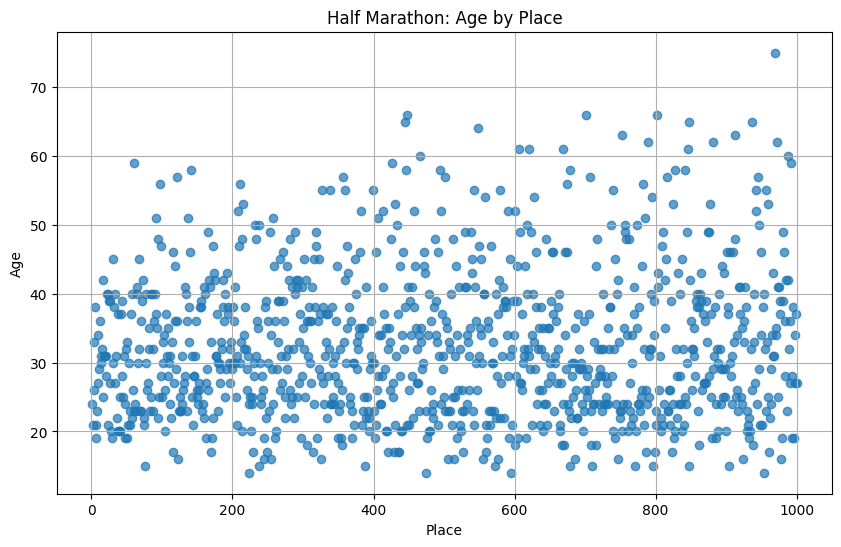

In [461]:
half_marathon = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
plt.scatter(half_marathon['Place'], half_marathon['Age'], alpha=0.7)
plt.xlabel('Place')
plt.ylabel('Age')
plt.title('Half Marathon: Age by Place')
plt.grid(True)
plt.show()

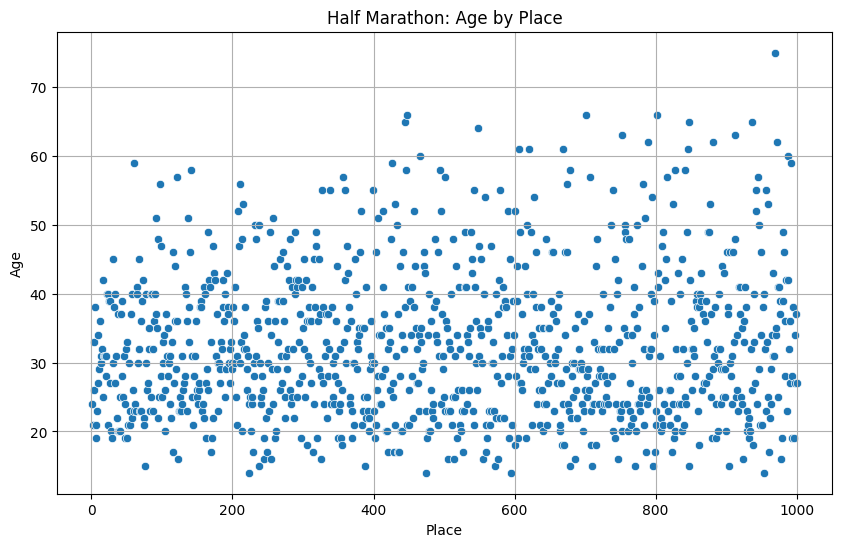

In [462]:

half_marathon = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=half_marathon, x='Place', y='Age')
plt.title('Half Marathon: Age by Place')
plt.grid(True)
plt.show()

In [463]:
avg_place_per_division = df.groupby('Division', as_index=False)['Place'].mean()
avg_place_per_division.rename(columns={'Place': 'Average Place'}, inplace=True)

# Display the new table
print(avg_place_per_division)

   Division  Average Place
0   F 01-17     653.166667
1   F 18-24     592.375000
2   F 25-29     536.612245
3   F 30-34     535.218750
4   F 35-39     600.333333
5   F 40-44     571.000000
6   F 45-49     399.250000
7   F 50-54     432.000000
8   F 55-59     508.666667
9   F 60-64     972.000000
10  F 65-69     847.000000
11  M 01-17     514.228571
12  M 18-24     483.091463
13  M 25-29     469.495935
14  M 30-34     459.319444
15  M 35-39     451.175926
16  M 40-44     465.026316
17  M 45-49     540.578947
18  M 50-54     557.192308
19  M 55-59     551.120000
20  M 60-64     734.363636
21  M 65-69     666.000000
22  OVERALF      36.000000
23  OVERALM       2.000000
24  UNDISCL     969.000000


In [464]:
import plotly.io as pio
pio.renderers.default = 'browser'

fig.show()

In [465]:
import pandas as pd
import plotly.express as px

# Start from your existing summary DataFrame
filtered = avg_place_per_division[~avg_place_per_division['Division'].isin(['OVERALF', 'OVERALM', 'UNDISCL'])].copy()

# Split into Gender and Age Group
filtered[['Gender', 'Age Group']] = filtered['Division'].str.extract(r'([MF])\s*(\d{2}-\d{2})')

# Pivot to get separate columns for M and F
pivot_df = filtered.pivot(index='Age Group', columns='Gender', values='Average Place').reset_index()

# Sort by age group numerically
pivot_df['Age Start'] = pivot_df['Age Group'].str.extract(r'(\d{2})').astype(int)
pivot_df.sort_values('Age Start', inplace=True)

# Plot dual-line graph
fig = px.line(
    pivot_df,
    x='Age Group',
    y=['M', 'F'],
    markers=True,
    labels={'value': 'Average Place', 'Age Group': 'Age Group', 'variable': 'Gender'},
    title='Average Place of Finish by Age Group and Gender within Top 1000 Finishers'
)

fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Average Place',
    legend_title='Gender',
    width=800,
    height=500
)

fig.show()

In [466]:
city_counts = df['City'].value_counts().nlargest(10).reset_index()
city_counts.columns = ['City', 'Count']

# Step 2: Plot with Plotly
fig = px.bar(
    city_counts,
    x='City',
    y='Count',
    title='Top 10 Most Common Cities in Dataset',
    labels={'Count': 'Number of Participants', 'City': 'City'},
    text='Count'
)

# Optional: Make it more readable
fig.update_layout(
    xaxis_tickangle=-45,
    width=800,
    height=500
)

fig.show()

In [467]:
half_marathon = pd.DataFrame(df)
half_marathon.head(10)

,Place,Bib,Name,Division,Age,Gender,City,Chip,Pace,Divp
0,1,9746,Jonathan Harley,OVERALM,24,Male,Cincinnati,1:07:44,5:11,1
1,2,18954,Bobby Ganser,OVERALM,21,Male,Louisville,1:10:16,5:22,2
2,3,9582,Eric Gruenbacher,OVERALM,33,Male,Loveland,1:10:52,5:25,3
3,4,13286,Joey Schlich,M 25-29,26,Male,Cincinnati,1:11:53,5:30,1
4,5,18263,John Thompson,M 35-39,38,Male,Villa Hills,1:12:39,5:33,1
5,6,16314,Alexander Paliga,M 18-24,21,Male,Medina,1:13:22,5:37,1
6,7,8168,Dominic Colussi,M 18-24,19,Male,Springboro,1:13:51,5:39,2
7,8,15845,Perry Johnson,M 18-24,23,Male,Mason,1:14:29,5:42,3
8,9,17671,Chris Parsons,M 25-29,27,Male,Ashland,1:15:10,5:45,2
9,10,18342,Ian Anderson,M 30-34,34,Male,Louisville,1:15:12,5:45,1


In [468]:
top_ten = half_marathon.head(10)
print(top_ten)

   Place    Bib              Name Division  Age Gender         City     Chip  \
0      1   9746   Jonathan Harley  OVERALM   24   Male   Cincinnati  1:07:44   
1      2  18954      Bobby Ganser  OVERALM   21   Male   Louisville  1:10:16   
2      3   9582  Eric Gruenbacher  OVERALM   33   Male     Loveland  1:10:52   
3      4  13286      Joey Schlich  M 25-29   26   Male   Cincinnati  1:11:53   
4      5  18263     John Thompson  M 35-39   38   Male  Villa Hills  1:12:39   
5      6  16314  Alexander Paliga  M 18-24   21   Male       Medina  1:13:22   
6      7   8168   Dominic Colussi  M 18-24   19   Male   Springboro  1:13:51   
7      8  15845     Perry Johnson  M 18-24   23   Male        Mason  1:14:29   
8      9  17671     Chris Parsons  M 25-29   27   Male      Ashland  1:15:10   
9     10  18342      Ian Anderson  M 30-34   34   Male   Louisville  1:15:12   

   Pace  Divp  
0  5:11     1  
1  5:22     2  
2  5:25     3  
3  5:30     1  
4  5:33     1  
5  5:37     1  
6  5:39

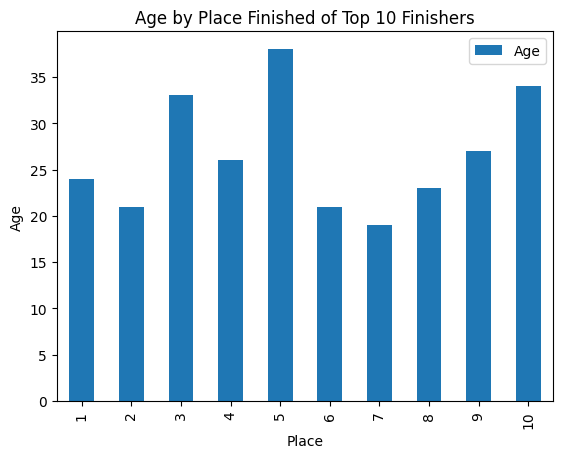

In [469]:
pandas_plot  = top_ten.plot(kind='bar', x='Place', y='Age', title='Age by Place Finished of Top 10 Finishers');
pandas_plot.set_xlabel('Place');
pandas_plot.set_ylabel('Age');

In [470]:
female_runners = half_marathon[half_marathon['Gender'] == 'Female']
female_runners.head(10)

,Place,Bib,Name,Division,Age,Gender,City,Chip,Pace,Divp
26,27,14258,Madeline Trevisan,OVERALF,27,Female,Cincinnati,1:19:50,6:06,1
31,32,16600,Jenny Simpson,OVERALF,38,Female,Boulder,1:21:02,6:12,2
48,49,9895,Tricia Hengehold,OVERALF,32,Female,Columbus,1:22:41,6:19,3
51,52,15072,Lexi Baker,F 18-24,21,Female,Union,1:23:02,6:21,1
71,72,10760,Alissa Kolarik,F 35-39,39,Female,Wadsworth,1:24:52,6:29,1
90,91,9017,Kelly Fisher,F 35-39,37,Female,Oregonia,1:26:47,6:38,2
97,98,18349,Claire Barker,F 25-29,28,Female,Cincinnati,1:27:04,6:39,1
103,104,9683,Abigail Halsey,F 25-29,26,Female,Highland Heights,1:27:34,6:42,2
109,110,14545,Tessa Ward,F 30-34,30,Female,Cincinnati,1:28:05,6:44,1
111,112,12048,Marie Myers,F 30-34,31,Female,Cincinnati,1:28:08,6:44,2


In [471]:
half_marathon = half_marathon.sort_values(by='Bib', ascending=True)
half_marathon.head(10)

,Place,Bib,Name,Division,Age,Gender,City,Chip,Pace,Divp
781,782,720,Luke Takahashi,M 55-59,56,Male,Union,1:44:06,7:57,19
351,352,1199,John Colton,M 30-34,32,Male,Cincinnati,1:36:52,7:24,58
377,378,3038,Colton Sayers,M 30-34,32,Male,Covington,1:37:37,7:28,63
804,805,4703,Cole Ralenkotter,M 25-29,26,Male,Villa Hills,1:44:22,7:59,97
883,884,6900,Helmuth Aboites Hintze,M 35-39,38,Male,South Lebanon,1:45:16,8:03,99
905,906,6923,Ryan Adcock,M 45-49,46,Male,Cincinnati,1:45:39,8:04,52
391,392,6932,Katie Adkins,F 18-24,23,Female,South Shore,1:37:48,7:28,16
471,472,6967,Daryl Alexander,M 45-49,46,Male,Erlanger,1:39:31,7:36,23
641,642,6980,Daegan Allen,M 18-24,24,Male,Nashville,1:42:11,7:49,104
430,431,6988,Zachary Allen,M 18-24,21,Male,O Fallon,1:38:40,7:32,72


In [472]:
half_marathon = half_marathon.sort_values(by='Age', ascending=False)
half_marathon.head(10)

,Place,Bib,Name,Division,Age,Gender,City,Chip,Pace,Divp
968,969,10386,Andrew Jones,UNDISCL,75,Unknown,Coldwater,1:46:27,8:08,1
446,447,15671,Stuart Hamilton,M 65-69,66,Male,Massillon,1:38:53,7:33,2
801,802,7830,Lon Bussell,M 65-69,66,Male,Cincinnati,1:44:20,7:58,4
700,701,19252,Jim Frondorf,M 65-69,66,Male,NaN,1:42:57,7:52,3
935,936,10894,Emile Lachance,M 65-69,65,Male,Dayton,1:46:02,8:06,5
846,847,19905,Shari Andrews,F 65-69,65,Female,Cincinnati,1:44:52,8:01,1
443,444,8333,Ronald Crump,M 65-69,65,Male,Elizabethtown,1:38:51,7:33,1
547,548,9337,Phil Gibbons,M 60-64,64,Male,Pittsburgh,1:40:46,7:42,2
911,912,7457,Kevin Biggs,M 60-64,63,Male,Cincinnati,1:45:47,8:05,10
751,752,15339,Dan Cowles,M 60-64,63,Male,Plano,1:43:44,7:56,6


In [473]:
oldest_ten = half_marathon.head(10)
print(oldest_ten)

     Place    Bib             Name Division  Age   Gender           City  \
968    969  10386     Andrew Jones  UNDISCL   75  Unknown      Coldwater   
446    447  15671  Stuart Hamilton  M 65-69   66     Male      Massillon   
801    802   7830      Lon Bussell  M 65-69   66     Male     Cincinnati   
700    701  19252     Jim Frondorf  M 65-69   66     Male            NaN   
935    936  10894   Emile Lachance  M 65-69   65     Male         Dayton   
846    847  19905    Shari Andrews  F 65-69   65   Female     Cincinnati   
443    444   8333     Ronald Crump  M 65-69   65     Male  Elizabethtown   
547    548   9337     Phil Gibbons  M 60-64   64     Male     Pittsburgh   
911    912   7457      Kevin Biggs  M 60-64   63     Male     Cincinnati   
751    752  15339       Dan Cowles  M 60-64   63     Male          Plano   

        Chip  Pace  Divp  
968  1:46:27  8:08     1  
446  1:38:53  7:33     2  
801  1:44:20  7:58     4  
700  1:42:57  7:52     3  
935  1:46:02  8:06     5  
8

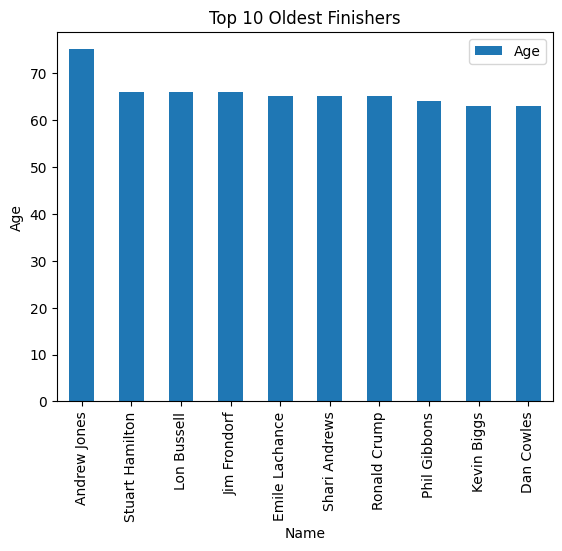

In [474]:
pandas_plot = oldest_ten.plot(kind='bar', x='Name', y='Age', title='Top 10 Oldest Finishers');
pandas_plot.set_xlabel('Name');
pandas_plot.set_ylabel('Age');

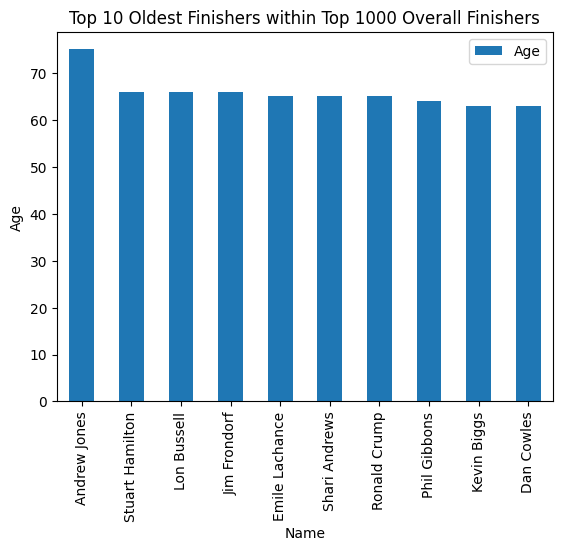

In [475]:
color = ['red' if Name == 'Andrew Jones' else 'blue' for Name in oldest_ten['Name']]
pandas_plot = oldest_ten.plot(kind='bar', x='Name', y='Age', title='Top 10 Oldest Finishers within Top 1000 Overall Finishers')
pandas_plot.set_xlabel('Name');
pandas_plot.set_ylabel('Age');

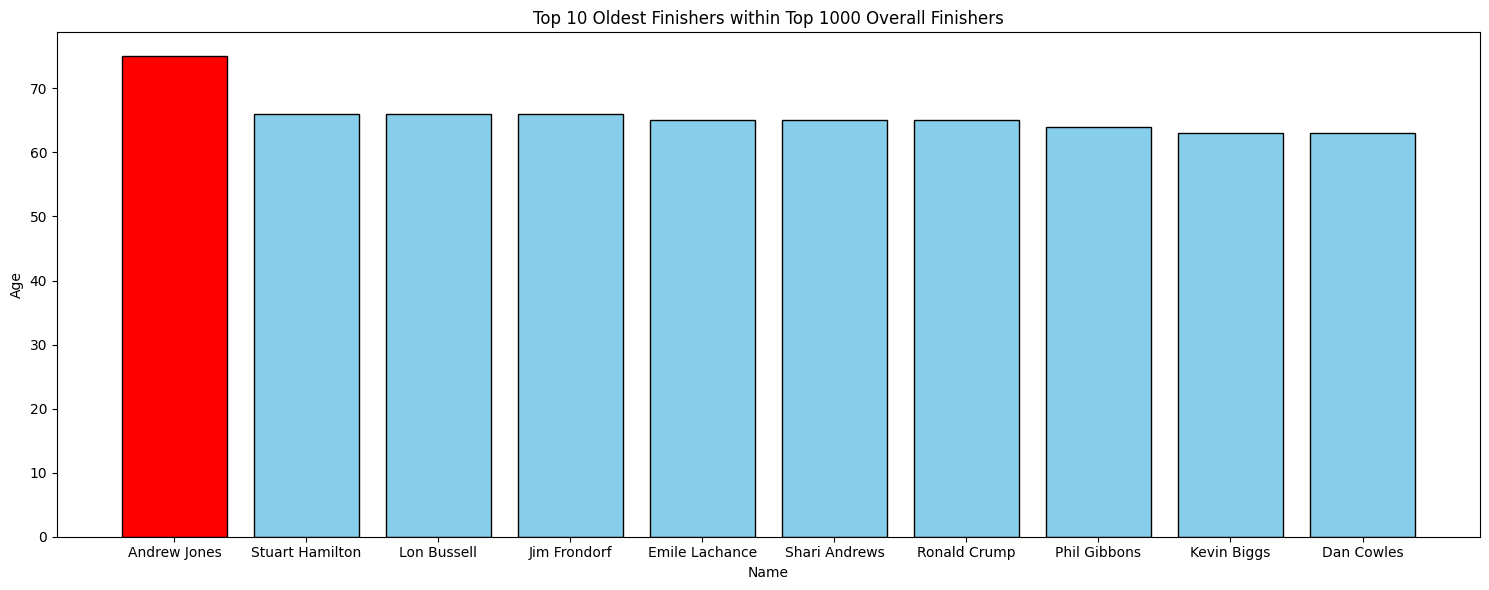

In [476]:
plt.figure(figsize=(15,6))
plt.bar(oldest_ten['Name'], oldest_ten['Age'], color = ['red' if name == 'Andrew Jones' else 'skyblue' for name in oldest_ten['Name']], edgecolor='black')

plt.title('Top 10 Oldest Finishers within Top 1000 Overall Finishers')
plt.xlabel('Name')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


In [477]:

oldest_ten['Color'] = oldest_ten['Name'].apply(lambda x: 'red' if x == 'Andrew Jones' else 'skyblue')

C:\Users\skce222\AppData\Local\Temp\ipykernel_24872\404625934.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [478]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\skce222\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [479]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\skce222\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [480]:
import plotly.express as px

In [481]:
fig = px.bar(
    oldest_ten,
    x='Name',
    y='Age',
    color='Color',
    hover_name='Name',
    hover_data={'Color': False, 'Bib': True, 'Name': True, 'Age': True, 'Gender': True, 'Division': True, 'City': True, 'Place': True, 'Chip': True, 'Pace': True},
    title='Top 10 Oldest Finishers within Top 1000 Overall Finishers'
)

# Update layout to match the original styling
fig.update_layout(
    xaxis_title='Name',
    yaxis_title='Age',
    width=1000,
    height=400,
    xaxis_tickangle=-45,
    hoverlabel=dict(font_size=12),
    showlegend=False,
)
